In [45]:
# data manipulations
import numpy as np
import pandas as pd

# data preaparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
# dealing with images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# for writing the models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# metrics 
from sklearn.metrics import confusion_matrix

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
metadata = pd.read_csv("processed_metadata.csv")
metadata.head()

,path,segment,label,samplingrate,ms
0,./Labelled/Bleatings/evt_000_000_000681_210415...,0,Bleatings,16000,3000.0
1,./Labelled/Bleatings/evt_000_000_000681_210415...,1,Bleatings,16000,3000.0
2,./Labelled/Bleatings/evt_000_000_000681_210415...,2,Bleatings,16000,3000.0
3,./Labelled/Bleatings/evt_000_000_000681_210415...,3,Bleatings,16000,3000.0
4,./Labelled/Bleatings/evt_000_000_000681_210415...,4,Bleatings,16000,3000.0


# Convolutional Neural Network on log Mel-spectrogram images

In [6]:
path_dir = "./img_data"

datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split = 0.2)

train_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(128,94),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(128,94),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 5312 images belonging to 3 classes.
Found 1327 images belonging to 3 classes.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout, AveragePooling2D

## First CNN 

In [32]:
model = Sequential()
input_shape=(128, 94, 3)

#1st hidden layer
model.add(Conv2D(32, (3, 3), activation='relu', strides=(2, 2), input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
#2nd hidden layer
model.add(Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding="same"))
model.add(MaxPool2D((2, 2)))
#3rd hidden layer
model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(MaxPool2D((2, 2)))
#ANN
model.add(Flatten())
model.add(Dropout(rate=0.5))#Add fully connected layer.
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units = 64, activation='relu'))
model.add(Dropout(rate=0.25))
#Output layer
model.add(Dense(units= 3, activation='softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 63, 46, 32)        896       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 31, 23, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 16, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 8, 6, 64)          0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 8, 6, 128)         73856     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 4, 3, 128)         0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 1536)            

In [35]:
adam = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [36]:
model.fit(train_generator, batch_size=32, epochs=50)

Epoch 1/50
166/166 [==============================] - 51s 305ms/step - loss: 0.6132 - accuracy: 0.7331
Epoch 2/50
166/166 [==============================] - 21s 125ms/step - loss: 0.4296 - accuracy: 0.8144
Epoch 3/50
166/166 [==============================] - 21s 126ms/step - loss: 0.3838 - accuracy: 0.8355
Epoch 4/50
166/166 [==============================] - 21s 125ms/step - loss: 0.3666 - accuracy: 0.8358
Epoch 5/50
166/166 [==============================] - 22s 130ms/step - loss: 0.3341 - accuracy: 0.8596
Epoch 6/50
166/166 [==============================] - 22s 130ms/step - loss: 0.3208 - accuracy: 0.8577
Epoch 7/50
166/166 [==============================] - 21s 128ms/step - loss: 0.3099 - accuracy: 0.8656
Epoch 8/50
166/166 [==============================] - 21s 129ms/step - loss: 0.2970 - accuracy: 0.8741
Epoch 9/50
166/166 [==============================] - 21s 129ms/step - loss: 0.2888 - accuracy: 0.8735
Epoch 10/50
166/166 [==============================] - 21s 129ms/step - l

In [43]:
test_accuracy = model.evaluate(validation_generator)


42/42 [==============================] - 4s 92ms/step - loss: 0.8039 - accuracy: 0.8772
n Test_Accuracy: [0.8038811087608337, 0.8771665692329407]


confusion matrix
[[677   0   0]
 [  0 117   0]
 [  0   0 533]]


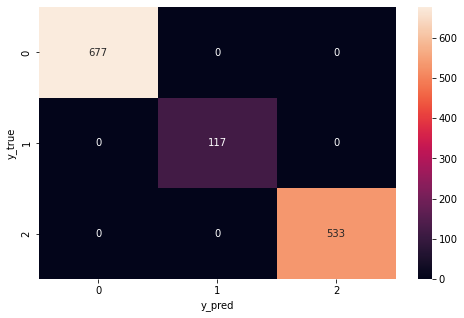

In [46]:
pred = model.predict(validation_generator)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, ‘r’, label=’Training acc’)
plt.plot(epochs, val_acc, ‘b’, label=’Validation acc’)
plt.title(‘Training and validation accuracy’)
plt.ylabel(‘accuracy’) 
plt.xlabel(‘epoch’)
plt.legend()
plt.figure()
plt.plot(epochs, loss, ‘r’, label=’Training loss’)
plt.plot(epochs, val_loss, ‘b’, label=’Validation loss’)
plt.title(‘Training and validation loss’)
plt.ylabel(‘loss’) 
plt.xlabel(‘epoch’)
plt.legend()
plt.show()

## Second CNN

In [47]:
# build a sequential model
model1 = Sequential()
model1.add(InputLayer(input_shape=(128, 94, 3)))

# 1st conv block
model1.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model1.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# 2nd conv block
model1.add(Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model1.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model1.add(BatchNormalization())
# 3rd conv block
model1.add(Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model1.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model1.add(BatchNormalization())
# ANN block
model1.add(Flatten())
model1.add(Dense(units=100, activation='relu'))
model1.add(Dense(units=50, activation='relu'))
model1.add(Dropout(0.25))
# output layer
model1.add(Dense(units=3, activation='softmax'))
model1.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 128, 94, 25)       1900      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 64, 47, 25)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 32, 24, 50)        31300     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 16, 12, 50)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 12, 50)        200       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 8, 6, 70)          31570     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 4, 3, 70)        

In [48]:
adam = keras.optimizers.Adam(lr=0.001)
model1.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model1.fit(train_generator, batch_size=32, epochs=50)

Epoch 1/50
166/166 [==============================] - 41s 247ms/step - loss: 0.5358 - accuracy: 0.7673
Epoch 2/50
166/166 [==============================] - 43s 261ms/step - loss: 0.3948 - accuracy: 0.8357
Epoch 3/50
166/166 [==============================] - 44s 264ms/step - loss: 0.3613 - accuracy: 0.8477
Epoch 4/50
166/166 [==============================] - 44s 266ms/step - loss: 0.3185 - accuracy: 0.8607
Epoch 5/50
166/166 [==============================] - 43s 262ms/step - loss: 0.3027 - accuracy: 0.8669
Epoch 6/50
166/166 [==============================] - 44s 267ms/step - loss: 0.2657 - accuracy: 0.8810
Epoch 7/50
166/166 [==============================] - 46s 278ms/step - loss: 0.2552 - accuracy: 0.8850
Epoch 8/50
166/166 [==============================] - 47s 283ms/step - loss: 0.2301 - accuracy: 0.9012
Epoch 9/50
166/166 [==============================] - 45s 273ms/step - loss: 0.2084 - accuracy: 0.9155
Epoch 10/50
166/166 [==============================] - 45s 273ms/step - l

In [51]:
test_accuracy = model1.evaluate(validation_generator)

42/42 [==============================] - 5s 117ms/step - loss: 1.5366 - accuracy: 0.8696


confusion matrix
[[685   0   0]
 [  0  95   0]
 [  0   0 547]]


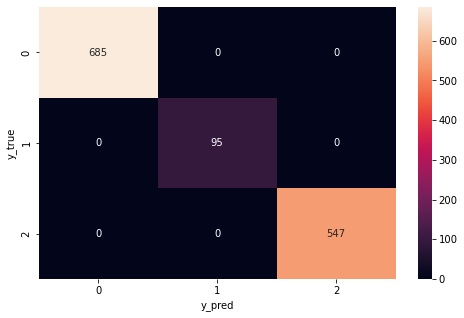

In [55]:
pred = model1.predict(validation_generator)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Third CNN 

In [49]:
model2 = tf.keras.models.Sequential([
    #first_convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128, 94, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #second_convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #third_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #fourth_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #out ANN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') 
]) 
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 63, 46, 32)        896       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 31, 23, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 16, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 8, 6, 64)          0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 8, 6, 128)         73856     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 4, 3, 128)         0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 1536)            

In [50]:
adam = keras.optimizers.Adam(lr=0.001)
model2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model2.fit(train_generator, batch_size=32, epochs=50)

Epoch 1/50
166/166 [==============================] - 40s 243ms/step - loss: 0.5435 - accuracy: 0.7639
Epoch 2/50
166/166 [==============================] - 38s 230ms/step - loss: 0.3931 - accuracy: 0.8268
Epoch 3/50
166/166 [==============================] - 39s 235ms/step - loss: 0.3627 - accuracy: 0.8436
Epoch 4/50
166/166 [==============================] - 38s 232ms/step - loss: 0.3325 - accuracy: 0.8605
Epoch 5/50
166/166 [==============================] - 39s 237ms/step - loss: 0.3144 - accuracy: 0.8658
Epoch 6/50
166/166 [==============================] - 40s 238ms/step - loss: 0.2938 - accuracy: 0.8737
Epoch 7/50
166/166 [==============================] - 39s 234ms/step - loss: 0.2875 - accuracy: 0.8735
Epoch 8/50
166/166 [==============================] - 42s 252ms/step - loss: 0.2694 - accuracy: 0.8827
Epoch 9/50
166/166 [==============================] - 40s 240ms/step - loss: 0.2552 - accuracy: 0.8887
Epoch 10/50
166/166 [==============================] - 39s 236ms/step - l

In [52]:
test_accuracy = model2.evaluate(validation_generator)

42/42 [==============================] - 4s 106ms/step - loss: 1.0514 - accuracy: 0.8832


confusion matrix
[[713   0   0]
 [  0  74   0]
 [  0   0 540]]


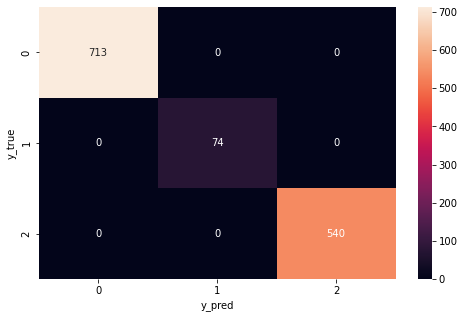

In [54]:
pred = model2.predict(validation_generator)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Prepare train and test data

In [4]:
#df = pd.read_csv("sample.csv", index_col="filename")
df = pd.read_csv("mfcc_deltamfcc.csv", index_col="path")

df.head()

,label,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
path,,,,,,,,,,,,,,,,,,,,,
./Labelled/Bleatings/evt_000_000_000681_210415_150602.wav,Bleatings,0.347820,0.155233,-0.232169,-0.201178,0.206299,-0.812587,0.350786,-0.459605,-0.483644,...,-0.136273,-1.512237,0.313718,-0.025292,0.424550,0.618080,0.493849,-0.480913,0.115574,-0.861757
./Labelled/Bleatings/evt_000_000_000682_210415_150623.wav,Bleatings,0.600532,-0.009147,-0.807296,-0.633419,-0.555820,-0.483127,-0.247325,0.688479,1.102261,...,0.158165,-0.020859,0.099358,0.669381,-0.757209,0.146002,0.395391,0.874418,0.921241,0.427156
./Labelled/Bleatings/evt_000_000_000683_210415_150637.wav,Bleatings,0.146909,0.494060,-0.097277,0.017268,0.327210,0.516250,0.927306,-1.170098,0.393075,...,-0.856356,-0.551477,-0.552312,0.002518,-0.085520,-0.047403,-0.229064,-0.437311,0.156396,-0.163401
./Labelled/Bleatings/evt_000_000_000684_210415_150654.wav,Bleatings,0.805780,0.976582,-0.477301,0.686392,-0.606207,-1.136907,-1.306880,-0.922357,-0.334283,...,0.008805,-1.164836,-0.138124,0.264209,-0.138784,0.276497,-0.528750,0.180946,0.164339,-0.217783
./Labelled/Bleatings/evt_000_000_002434_210416_073853.wav,Bleatings,0.651157,-0.002178,-0.902648,0.265438,-1.208112,-0.640320,-0.343720,1.102376,0.713345,...,0.756449,0.452530,0.357011,0.359743,0.118464,0.318001,0.526162,0.199136,-0.190216,-0.760688


Extract and prepare the labels

In [5]:
label_list = df["label"]
encoder = LabelEncoder()
y = encoder.fit_transform(label_list)#Scaling the Feature columns
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Extract and scale the data

In [6]:
#df.iloc[:, :-1].head()

,label,0,1,2,3,4,5,6,7,8,...,189,190,191,192,193,194,195,196,197,198
path,,,,,,,,,,,,,,,,,,,,,
./Labelled/Bleatings/evt_000_000_000681_210415_150602.wav,Bleatings,0.347820,0.155233,-0.232169,-0.201178,0.206299,-0.812587,0.350786,-0.459605,-0.483644,...,0.404122,-0.136273,-1.512237,0.313718,-0.025292,0.424550,0.618080,0.493849,-0.480913,0.115574
./Labelled/Bleatings/evt_000_000_000682_210415_150623.wav,Bleatings,0.600532,-0.009147,-0.807296,-0.633419,-0.555820,-0.483127,-0.247325,0.688479,1.102261,...,0.663562,0.158165,-0.020859,0.099358,0.669381,-0.757209,0.146002,0.395391,0.874418,0.921241
./Labelled/Bleatings/evt_000_000_000683_210415_150637.wav,Bleatings,0.146909,0.494060,-0.097277,0.017268,0.327210,0.516250,0.927306,-1.170098,0.393075,...,0.305720,-0.856356,-0.551477,-0.552312,0.002518,-0.085520,-0.047403,-0.229064,-0.437311,0.156396
./Labelled/Bleatings/evt_000_000_000684_210415_150654.wav,Bleatings,0.805780,0.976582,-0.477301,0.686392,-0.606207,-1.136907,-1.306880,-0.922357,-0.334283,...,-0.506387,0.008805,-1.164836,-0.138124,0.264209,-0.138784,0.276497,-0.528750,0.180946,0.164339
./Labelled/Bleatings/evt_000_000_002434_210416_073853.wav,Bleatings,0.651157,-0.002178,-0.902648,0.265438,-1.208112,-0.640320,-0.343720,1.102376,0.713345,...,0.275443,0.756449,0.452530,0.357011,0.359743,0.118464,0.318001,0.526162,0.199136,-0.190216


In [10]:
#scaler = StandardScaler()
#X = scaler.fit_transform(np.array(df.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X = np.array(df.iloc[:,1:])
X

array([[ 0.34781968,  0.15523269, -0.23216898, ..., -0.480913  ,
         0.11557389, -0.8617569 ],
       [ 0.60053222, -0.00914684, -0.80729602, ...,  0.87441772,
         0.92124129,  0.42715648],
       [ 0.14690949,  0.49406041, -0.09727726, ..., -0.437311  ,
         0.15639632, -0.1634006 ],
       ...,
       [-0.80134407,  0.67376678,  1.64300066, ...,  0.4749902 ,
         0.44821466,  0.12015271],
       [-1.06595033,  0.50232601,  1.30117149, ..., -0.23080317,
        -0.31921245, -1.05481112],
       [-1.28945793, -0.10242232,  1.45239209, ...,  0.51314051,
        -1.91284518, -0.04138619]])

And finally split in train and test data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"{np.shape(X_train)}, {np.shape(X_test)}, {np.shape(y_train)}, {np.shape(y_test)}")

(661, 200), (166, 200), (661,), (166,)


# Train a model

Let's build a simple ANN 

In [12]:
model = keras.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=10)

Epoch 1/100
67/67 [==============================] - 0s 955us/step - loss: 0.8344 - accuracy: 0.8533
Epoch 2/100
67/67 [==============================] - 0s 955us/step - loss: 0.1878 - accuracy: 0.9455
Epoch 3/100
67/67 [==============================] - 0s 881us/step - loss: 0.1050 - accuracy: 0.9758
Epoch 4/100
67/67 [==============================] - 0s 828us/step - loss: 0.0735 - accuracy: 0.9788
Epoch 5/100
67/67 [==============================] - 0s 898us/step - loss: 0.0513 - accuracy: 0.9879
Epoch 6/100
67/67 [==============================] - 0s 897us/step - loss: 0.0326 - accuracy: 0.9909
Epoch 7/100
67/67 [==============================] - 0s 814us/step - loss: 0.0247 - accuracy: 0.9939
Epoch 8/100
67/67 [==============================] - 0s 846us/step - loss: 0.0200 - accuracy: 0.9955
Epoch 9/100
67/67 [==============================] - 0s 830us/step - loss: 0.0169 - accuracy: 0.9970
Epoch 10/100
67/67 [==============================] - 0s 866us/step - loss: 0.0145 - accura

67/67 [==============================] - 0s 731us/step - loss: 1.6146e-04 - accuracy: 1.0000
Epoch 81/100
67/67 [==============================] - 0s 731us/step - loss: 1.5401e-04 - accuracy: 1.0000
Epoch 82/100
67/67 [==============================] - 0s 761us/step - loss: 1.4696e-04 - accuracy: 1.0000
Epoch 83/100
67/67 [==============================] - 0s 791us/step - loss: 1.4085e-04 - accuracy: 1.0000
Epoch 84/100
67/67 [==============================] - 0s 761us/step - loss: 1.3409e-04 - accuracy: 1.0000
Epoch 85/100
67/67 [==============================] - 0s 940us/step - loss: 1.2806e-04 - accuracy: 1.0000
Epoch 86/100
67/67 [==============================] - 0s 881us/step - loss: 1.2440e-04 - accuracy: 1.0000
Epoch 87/100
67/67 [==============================] - 0s 851us/step - loss: 1.1683e-04 - accuracy: 1.0000
Epoch 88/100
67/67 [==============================] - 0s 791us/step - loss: 1.1180e-04 - accuracy: 1.0000
Epoch 89/100
67/67 [==============================] - 0s 73

In [20]:
results = model.evaluate(X_test, y_test, batch_size=10)
print("test loss, test acc:", results)

17/17 [==============================] - 0s 766us/step - loss: 0.7015 - accuracy: 0.8855
test loss, test acc: [0.701509416103363, 0.8855421543121338]


In [21]:
print("Generate predictions for 10 samples")
predictions = model.predict(X_test[:10])
predictions

Generate predictions for 10 samples


array([[1.44131846e-07, 4.31372655e-07, 9.99999404e-01],
       [2.15698154e-10, 1.38699905e-08, 1.00000000e+00],
       [6.96154628e-14, 5.07831312e-11, 1.00000000e+00],
       [8.17135535e-03, 8.82230306e-05, 9.91740465e-01],
       [9.77296694e-13, 8.40859968e-08, 9.99999881e-01],
       [2.01135267e-21, 1.36356221e-15, 1.00000000e+00],
       [9.99993682e-01, 3.68519295e-07, 5.92666174e-06],
       [1.43916814e-11, 1.70348761e-13, 1.00000000e+00],
       [8.61946940e-02, 2.24715180e-07, 9.13805068e-01],
       [9.99989986e-01, 3.61334261e-11, 1.00424313e-05]], dtype=float32)

In [22]:
y_test[:10]

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 0])

In [23]:
real = y_test[:10]
predicted = np.argmax(predictions, axis=1)
pd.DataFrame(
    {"real": real,
     "predicted": predicted
    })

,real,predicted
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
5,2,2
6,0,0
7,2,2
8,0,2
9,0,0
